In [1]:
#!pip install gspread


In [80]:
#import libraries
import pandas as pd
import gspread
from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
gc = gspread.service_account(filename="C:\\Users\\User\\Downloads\\regression-378213-08cd4b2e0333.json")

In [4]:
gc

In [5]:
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1-BRp3oN-NMsnVZNPIffpU143nnPCpRZhgi3Xe9XqMu8/edit?usp=sharing")

In [6]:
#import dataset
ws = sheet.worksheet('Height-Weight Data')

In [7]:
ws

<Worksheet 'Height-Weight Data' id:453222948>

In [15]:
df = pd.DataFrame(ws.get_all_records())

In [16]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [23]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [24]:
#shape od dataframe
shape = df.shape

In [25]:
shape

(3501, 2)

Text(0.5, 1.0, 'Height and Weight table')

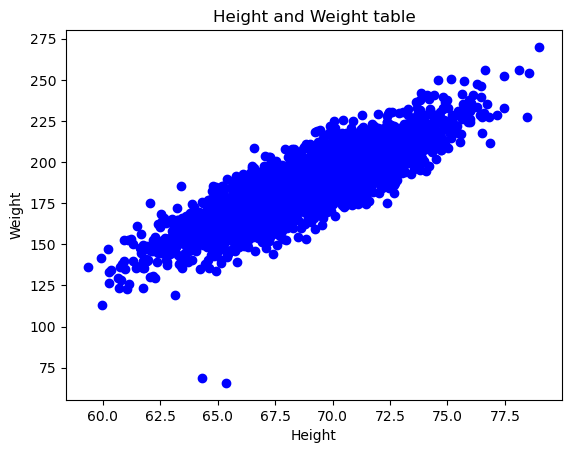

In [49]:
plt.scatter(df.Height , df.Weight , color='blue' )
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight table')

In [45]:
#separate
x= df.drop('Weight', axis=1)
y= df[['Weight']]

In [43]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [47]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [48]:
x.mean()

Height    69.024411
dtype: float64

In [50]:
y.mean()

Weight    186.891258
dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train,test = train_test_split(df, test_size=.25) #testing data=25%

In [62]:
train.shape

(2625, 2)

In [64]:
train.head()

,Height,Weight
426,60.748118,136.167866
1238,60.363312,134.146848
408,71.055664,203.139433
2415,68.925309,200.060003
3156,69.217009,188.089942


In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.25) #testing data=25%

In [66]:
xtrain.head()

,Height
3265,61.328502
1256,69.932710
1175,72.124910
2072,65.438043
2930,72.363354


In [67]:
ytrain.head()

,Weight
3265,139.827984
1256,185.429022
1175,215.443400
2072,178.446423
2930,216.056503


In [68]:
#linear regression
from sklearn.linear_model import LinearRegression

In [70]:
lr= LinearRegression()
lr.fit(xtrain, ytrain) #training the model

LinearRegression()

In [72]:
m = lr.coef_
m

array([[6.03834597]])

In [73]:
c = lr.intercept_
c

array([-229.78285108])

In [75]:
yp = (m*3265)+c
yp

array([[19485.41675521]])

In [77]:
yp = (m*1256)+c
yp

array([[7354.37969272]])

In [79]:
lr.predict([[1256]])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7354.37969272]])

In [82]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_rent,predicted_Weight
0,73.847017,241.893563,216.130987,216.130987
1,68.781904,162.310473,185.546082,185.546082
2,74.110105,212.740856,217.719605,217.719605
3,71.730978,220.042470,203.353614,203.353614
4,69.881796,206.349801,192.187610,192.187610


In [83]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_rent,predicted_Weight
0,73.847017,241.893563,216.130987,216.130987
1,68.781904,162.310473,185.546082,185.546082
2,74.110105,212.740856,217.719605,217.719605
3,71.730978,220.042470,203.353614,203.353614
4,69.881796,206.349801,192.187610,192.187610


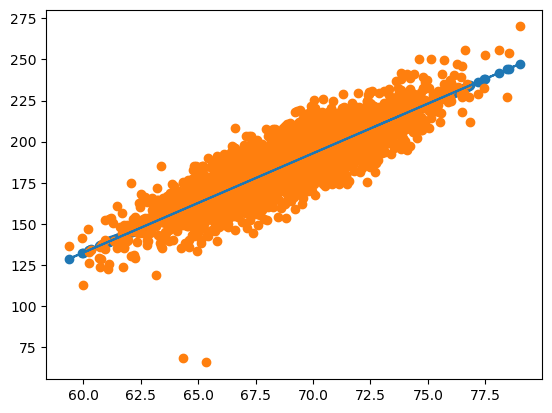

In [88]:
plt.plot(x, df[['predicted_Weight']])
plt.scatter(x,df[['predicted_Weight']])
plt.scatter(x,df[['Weight']])

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae =  mean_squared_error(ytest, lr.predict(xtest))

In [92]:
mae

97.51853566162369

In [93]:
mse

97.51853566162369